# L03: Perceptrons

Implementation of the classic Perceptron by Frank Rosenblatt for binary classification (here: 0/1 class labels).

## Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Montando o drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Preparing a toy dataset

In [3]:
##########################
### DATASET
##########################

data = np.genfromtxt('/content/drive/My Drive/Disciplinas/Pattern Recognition/Public/L03_perceptron/code/data/perceptron_and.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

Class label counts: [3 1]
X.shape: (4, 2)
y.shape: (4,)


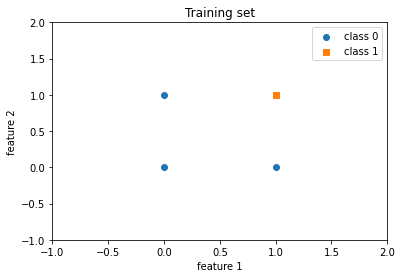

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.legend()
plt.show()

## Defining the Perceptron model

In [0]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float)
        self.bias = np.zeros(1, dtype=np.float)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors

                print('Model parameters epoch %d: \n' %e)
                print('  Weights: %s' % ppn.weights)
                print('  Bias: %s\n' % ppn.bias)
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

## Training the Perceptron

In [36]:
ppn = Perceptron(num_features=2)

ppn.train(X, y, epochs=5)

Model parameters epoch 0: 

  Weights: [[0.]
 [0.]]
  Bias: [0.]

Model parameters epoch 0: 

  Weights: [[0.]
 [0.]]
  Bias: [0.]

Model parameters epoch 0: 

  Weights: [[0.]
 [0.]]
  Bias: [0.]

Model parameters epoch 0: 

  Weights: [[1.]
 [1.]]
  Bias: [1.]

Model parameters epoch 1: 

  Weights: [[1.]
 [1.]]
  Bias: [0.]

Model parameters epoch 1: 

  Weights: [[1.]
 [0.]]
  Bias: [-1.]

Model parameters epoch 1: 

  Weights: [[1.]
 [0.]]
  Bias: [-1.]

Model parameters epoch 1: 

  Weights: [[2.]
 [1.]]
  Bias: [0.]

Model parameters epoch 2: 

  Weights: [[2.]
 [1.]]
  Bias: [0.]

Model parameters epoch 2: 

  Weights: [[2.]
 [0.]]
  Bias: [-1.]

Model parameters epoch 2: 

  Weights: [[1.]
 [0.]]
  Bias: [-2.]

Model parameters epoch 2: 

  Weights: [[2.]
 [1.]]
  Bias: [-1.]

Model parameters epoch 3: 

  Weights: [[2.]
 [1.]]
  Bias: [-1.]

Model parameters epoch 3: 

  Weights: [[2.]
 [1.]]
  Bias: [-1.]

Model parameters epoch 3: 

  Weights: [[1.]
 [1.]]
  Bias: [-2.]

Mo

## Evaluating the model

In [26]:
test_acc = ppn.evaluate(X, y)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


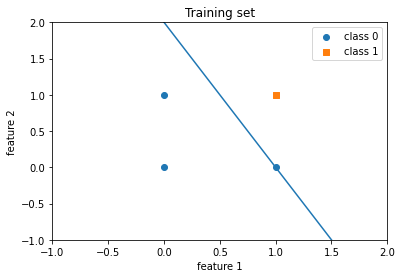

In [27]:
##########################
### 2D Decision Boundary
##########################

w, b = ppn.weights, ppn.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )

plt.plot([x_min, x_max], [y_min, y_max])

plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.legend()
plt.show()